In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
import pickle as pkl
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
legacydf=pd.read_csv("C:\\Users\\rayba\\OneDrive - Ashesi University\\Intro to AI\\male_players (legacy).csv", na_values='-')

C:\Users\rayba\AppData\Local\Temp\ipykernel_15548\1129287531.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  legacydf=pd.read_csv("C:\\Users\\rayba\\OneDrive - Ashesi University\\Intro to AI\\male_players (legacy).csv", na_values='-')


#QUESTION 1

In [4]:
legacydf.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,161583.000000,161583.000000,161583.0,161583.000000,161583.000000,1.595300e+05,159822.000000,161583.000000,161583.000000,161583.000000,...,128722.000000,161583.000000,161583.000000,161583.000000,161583.00000,161583.000000,161583.000000,161583.000000,161583.000000,17969.000000
mean,214484.722353,19.125514,2.0,65.699071,70.744008,2.326770e+06,10855.409768,25.123181,181.240205,75.235031,...,57.816892,45.757957,47.669996,45.698588,16.52961,16.274918,16.140374,16.288861,16.636973,39.149090
std,34928.608856,2.559318,0.0,7.040855,6.259121,6.005746e+06,21941.656285,4.670207,6.750148,7.000456,...,12.329739,20.453699,21.336404,20.935273,17.67047,16.834294,16.476466,16.998697,17.980143,10.503788
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.000000,16.000000,154.000000,49.000000,...,3.000000,1.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,199159.000000,17.000000,2.0,61.000000,66.000000,3.250000e+05,2000.000000,21.000000,176.000000,70.000000,...,50.000000,26.000000,27.000000,25.000000,8.00000,8.000000,8.000000,8.000000,8.000000,31.000000
50%,220621.000000,19.000000,2.0,66.000000,70.000000,7.250000e+05,4000.000000,25.000000,181.000000,75.000000,...,59.000000,50.000000,54.000000,52.000000,11.00000,11.000000,11.000000,11.000000,11.000000,41.000000
75%,236958.000000,21.000000,2.0,70.000000,75.000000,1.800000e+06,10000.000000,28.000000,186.000000,80.000000,...,66.000000,63.000000,66.000000,64.000000,14.00000,14.000000,14.000000,14.000000,14.000000,46.000000
max,271817.000000,23.000000,2.0,94.000000,95.000000,1.940000e+08,575000.000000,54.000000,208.000000,110.000000,...,96.000000,94.000000,94.000000,95.000000,91.00000,92.000000,95.000000,92.000000,94.000000,68.000000


In [5]:
legacydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB


In [6]:
print(legacydf.columns)

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object', length=110)


In [7]:
legacydf.dtypes



player_id            int64
player_url          object
fifa_version         int64
fifa_update          int64
fifa_update_date    object
                     ...  
cb                  object
rcb                 object
rb                  object
gk                  object
player_face_url     object
Length: 110, dtype: object

####Remove useless values

In [8]:
legacydf.isnull().sum()


player_id           0
player_url          0
fifa_version        0
fifa_update         0
fifa_update_date    0
                   ..
cb                  0
rcb                 0
rb                  0
gk                  0
player_face_url     0
Length: 110, dtype: int64

In [9]:
legacydf.drop(columns= ['player_id','nation_team_id','release_clause_eur','international_reputation','value_eur','wage_eur','league_level','club_team_id','league_id','player_url','fifa_version','dob','club_loaned_from','real_face', 'fifa_update_date', 'short_name', 'long_name','player_url','fifa_version', 'league_name','club_name','club_position','club_joined_date',
      'player_face_url','player_tags','fifa_update'],axis = 1, inplace=True)

''''ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb','ldm','cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
'''

"'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',\n 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb','ldm','cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',\n"

In [10]:
legacydf.head()

,player_positions,overall,potential,age,height_cm,weight_kg,club_jersey_number,club_contract_valid_until_year,nationality_id,nationality_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,CF,93,95,27,169,67,10.0,2018.0,52,Argentina,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3
1,"LW, LM",92,92,29,185,80,7.0,2018.0,38,Portugal,...,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3
2,"RM, LM, RW",90,90,30,180,80,10.0,2017.0,34,Netherlands,...,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3
3,ST,90,90,32,195,95,10.0,2016.0,46,Sweden,...,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3
4,GK,90,90,28,193,92,1.0,2019.0,21,Germany,...,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3


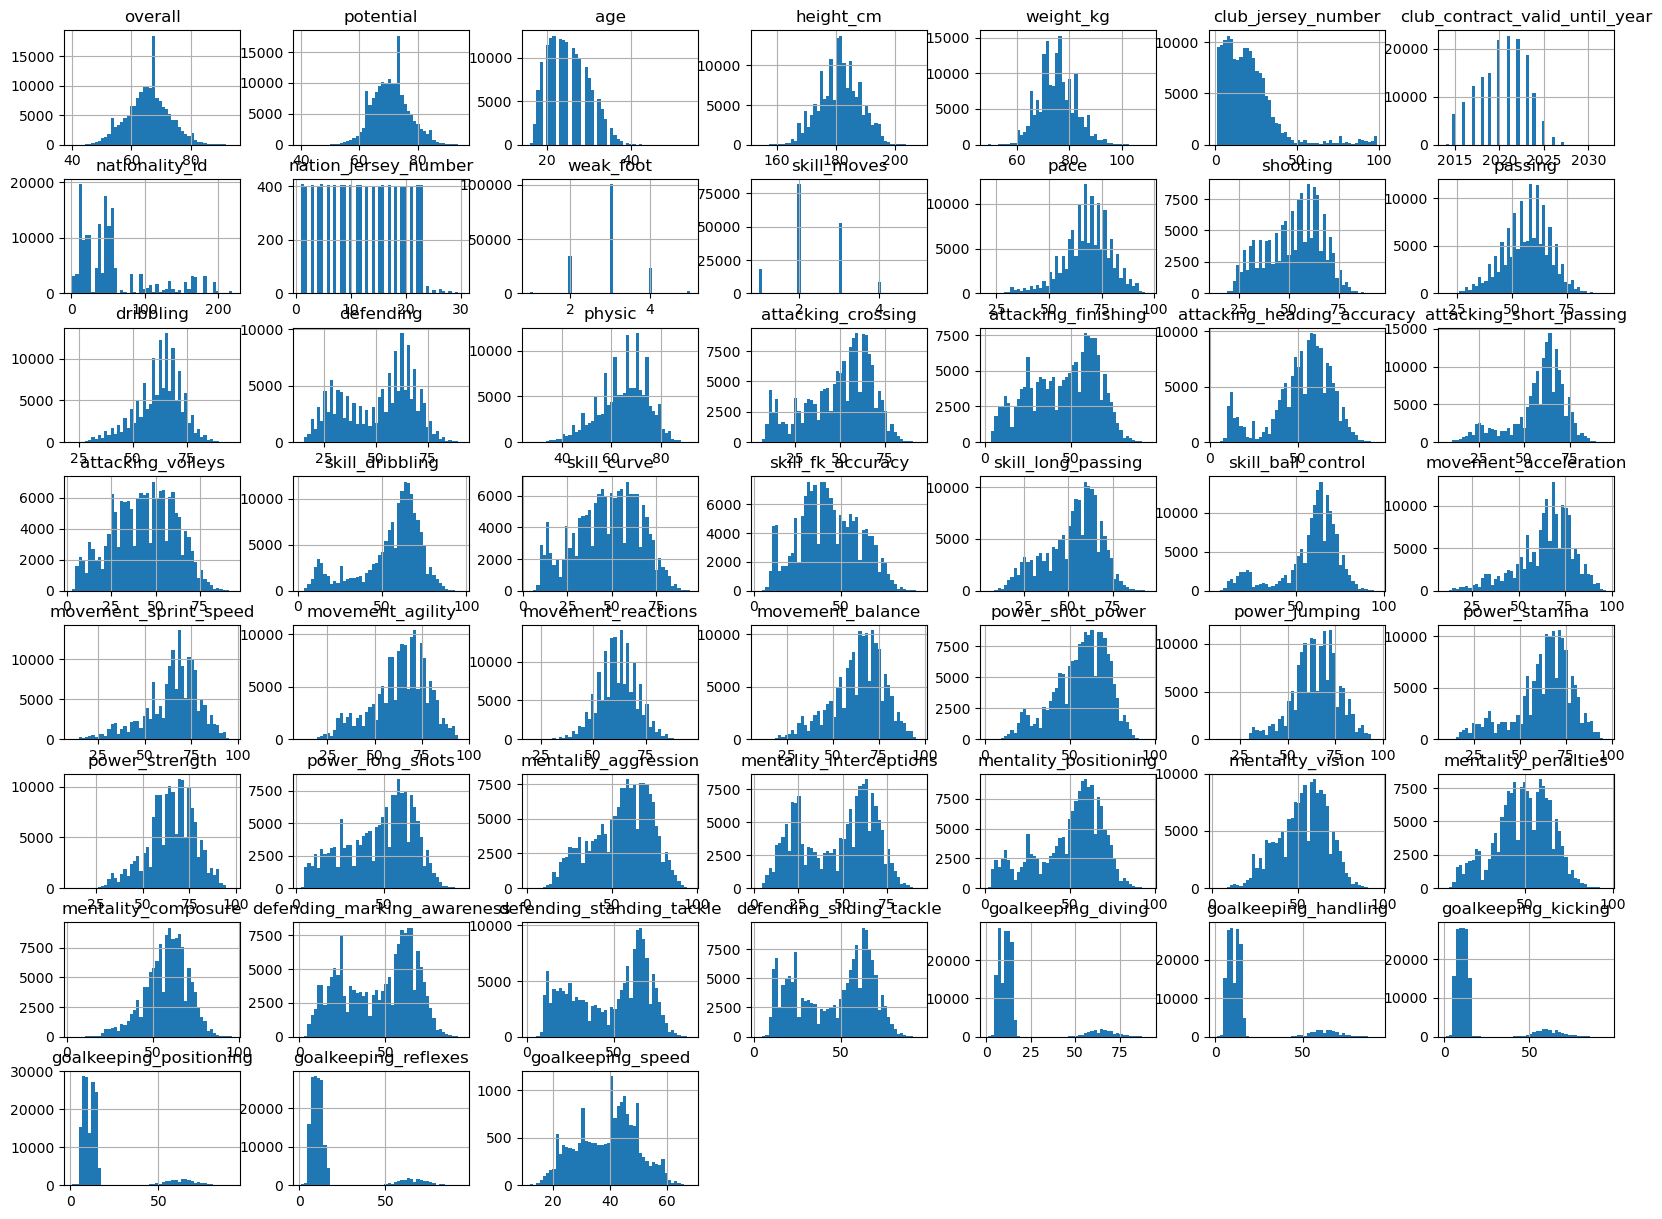

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline
legacydf.hist(bins=50, figsize=(20,15))
plt.show()


In [12]:
#scatter matrix found in pandas.plotting

#scatter_matrix(legacydf, alpha=0.2, figsize=(10, 10), diagonal='kde')
#plt.show()

In [13]:
threshold = 0.4
threshold_count = int(threshold*len(legacydf))
print(threshold_count)

L= []
L_less =[]
for i in legacydf.columns:
    if ((legacydf[i].isnull().sum())<(0.4*(legacydf.shape[0]))):
        L.append(i)
    else:
        L_less.append(i)

64633


In [14]:
legacydf= legacydf[L]

In [15]:
numeric_data = legacydf.select_dtypes(include = ['float64','int64'])
non_numeric = legacydf.select_dtypes(include = ['object'])

####impute the data using Simple Imputer

In [16]:
from sklearn.impute import SimpleImputer
sc = SimpleImputer(strategy ='median')
fill_numeric_data =sc.fit_transform(numeric_data)
numeric_data = pd.DataFrame(fill_numeric_data,columns = numeric_data.columns)

In [17]:
sc = SimpleImputer(strategy ='most_frequent')
fill_non_numeric_data = sc.fit_transform(non_numeric)
non_numeric = pd.DataFrame(fill_non_numeric_data,columns = non_numeric.columns)

In [18]:
#Check if the numeric data is stillnull
numeric_data.isnull().sum()

overall                           0
potential                         0
age                               0
height_cm                         0
weight_kg                         0
club_jersey_number                0
club_contract_valid_until_year    0
nationality_id                    0
weak_foot                         0
skill_moves                       0
pace                              0
shooting                          0
passing                           0
dribbling                         0
defending                         0
physic                            0
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed       

In [19]:
#Check if categorical data is still null
non_numeric.isnull().sum()

player_positions    0
nationality_name    0
preferred_foot      0
work_rate           0
body_type           0
ls                  0
st                  0
rs                  0
lw                  0
lf                  0
cf                  0
rf                  0
rw                  0
lam                 0
cam                 0
ram                 0
lm                  0
lcm                 0
cm                  0
rcm                 0
rm                  0
lwb                 0
ldm                 0
cdm                 0
rdm                 0
rwb                 0
lb                  0
lcb                 0
cb                  0
rcb                 0
rb                  0
gk                  0
dtype: int64

In [20]:
legacydata= pd.concat([numeric_data,non_numeric],axis =1)


In [21]:
#Encode the data

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [23]:
non_numeric_columns = non_numeric.columns

#for data in non_numeric_columns:
 # legacydata[data] = legacydata[data].astype(str)
#  legacydata[data] = legacydata[data].tolist()


In [24]:
non_numeric_columns

Index(['player_positions', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
       'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
       'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'],
      dtype='object')

In [25]:
#for data in non_numeric_columns:
 # label_encoder = LabelEncoder()
  #legacydata[data] = label_encoder.fit_transform(legacydata[data])
  #integer_encoded =  legacydata[data]

In [26]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(non_numeric_columns)

integer_encoded

array([18, 17, 19, 31,  0, 14, 30, 27, 15, 12,  4, 25, 28,  7,  1, 20, 13,
       10,  5, 23, 26, 16, 11,  3, 24, 29,  8,  9,  2, 22, 21,  6])

In [27]:
onehot_encoder = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
integer_encoded

array([[18],
       [17],
       [19],
       [31],
       [ 0],
       [14],
       [30],
       [27],
       [15],
       [12],
       [ 4],
       [25],
       [28],
       [ 7],
       [ 1],
       [20],
       [13],
       [10],
       [ 5],
       [23],
       [26],
       [16],
       [11],
       [ 3],
       [24],
       [29],
       [ 8],
       [ 9],
       [ 2],
       [22],
       [21],
       [ 6]])

In [28]:
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\Users\rayba\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
onehot_encoded_df = pd.DataFrame(onehot_encoded)
legacydf= pd.concat([numeric_data, onehot_encoded_df], axis=1)

# QUESTION 2
####Feature Engineering

#### Correlation with overall rating

In [30]:
 corr_matrix = legacydf.corr()
Cor = corr_matrix['overall'].sort_values(ascending=True)

# show the strong correlations
threshold = 0.5
strong_correlations = Cor[(Cor >= threshold) | (Cor <= -threshold)]
print("Strong Correlations (Threshold = 0.5):\n", strong_correlations)

Strong Correlations (Threshold = 0.5):
 18                     0.542755
dribbling              0.561034
mentality_composure    0.600033
passing                0.629868
potential              0.695362
movement_reactions     0.845753
overall                1.000000
Name: overall, dtype: float64


#### Scale independent variables

In [31]:
from sklearn.preprocessing import StandardScaler
X = legacydf[['dribbling','mentality_composure','passing','potential','movement_reactions']]
y = legacydf['overall']
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [32]:
pd.Series(y).value_counts()

overall
64.0    9826
65.0    9795
66.0    9645
67.0    9583
63.0    8919
68.0    8848
69.0    7921
62.0    7818
70.0    7466
61.0    6585
60.0    6503
71.0    6315
72.0    6076
73.0    5204
59.0    5014
58.0    4589
74.0    4243
75.0    4147
57.0    3774
56.0    3372
76.0    3000
55.0    2911
54.0    2431
77.0    2297
53.0    2116
78.0    1845
52.0    1804
79.0    1475
51.0    1327
80.0    1162
50.0    1055
81.0     820
82.0     705
49.0     601
83.0     517
48.0     381
84.0     372
85.0     231
47.0     199
86.0     163
87.0     129
88.0      98
46.0      76
89.0      69
90.0      41
45.0      36
91.0      24
44.0      19
92.0      11
93.0       7
94.0       6
42.0       4
43.0       3
40.0       3
41.0       2
Name: count, dtype: int64

# Question 3
##### Training Models


In [33]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

###### Use cross validation RandomForest, XGBoost, Gradient Boost Regressors

In [34]:
rf=RandomForestRegressor(n_estimators=100)

In [35]:
rf.fit(Xtrain, Ytrain)
#pkl.dump(rf, open('/content/drive/MyDrive/Colab Notebooks' + rf.__class__.__name__ + '.pkl', 'wb'))
rf_y_pred = rf.predict(Xtest)
#print(rf.__class__.__name__, confusion_matrix(Ytest, y_pred), classification_report(Ytest, y_pred))
print(rf_y_pred)

[63.78       58.59337771 68.49       ... 59.53       58.88
 69.78      ]


In [36]:
gb=GradientBoostingRegressor(n_estimators=100)

In [37]:
gb.fit(Xtrain, Ytrain)
 #pkl.dump(model, open('/content/' + model.__class__.__name__ + '.pkl', 'wb'))
gb_y_pred = gb.predict(Xtest)
#print(model.__class__.__name__, confusion_matrix(Ytest, y_pred), classification_report(Ytest, y_pred))
print(gb_y_pred)

[65.43684082 57.81531951 66.53844612 ... 61.27045875 58.0081617
 67.0411819 ]


In [38]:
xgb = XGBRegressor(n_estimators=100)

In [39]:
xgb.fit(Xtrain, Ytrain)
pkl.dump(xgb, open('C:\\Users\\rayba\\OneDrive - Ashesi University\\Intro to AI' + xgb.__class__.__name__ + '.pkl', 'wb'))

xbg_y_pred = xgb.predict(Xtest)
#print(xgb.__class__.__name__, confusion_matrix(Ytest, y_pred), classification_report(Ytest, y_pred))
print(xbg_y_pred)

[64.37101  57.478687 65.90105  ... 60.884445 58.52456  67.87662 ]


In [40]:
# Time to Cross Validate
rf_score=cross_val_score(rf, Xtrain, Ytrain, cv = 5, scoring = 'neg_mean_squared_error')
print(rf_score)
gb_score = cross_val_score(gb, Xtrain, Ytrain, cv=5, scoring='neg_mean_squared_error')
print(gb_score)
xgb_score = cross_val_score(xgb, Xtrain, Ytrain, cv=5, scoring='neg_mean_squared_error')
print(xgb_score)



[-6.31342113 -6.24675316 -6.3637807  -6.25854028 -6.06990562]
[-6.83179952 -6.71962934 -6.88143385 -6.75837865 -6.68975096]
[-6.035049   -5.98819554 -6.1706362  -5.9846974  -5.96751172]


# Question 4
##### Evaluation

###### Use MAE or RMSE and fine tuned model, train and test it

In [41]:
print(f"mean squared error from Random Forest Regressor is { mean_squared_error(Ytest,rf_y_pred)}")

print(f"mean squared error from Gradient Boosting Regressor is { mean_squared_error(Ytest,gb_y_pred)}")
print(f"mean squared error from XGB Regressor is { mean_squared_error(Ytest,xbg_y_pred)}")

rf_score =np.sqrt(-(rf_score.mean()))
print(f" Root mean squared error from Random Forest Regressor is {rf_score}")
gb_score = np.sqrt(-(gb_score.mean()))
print(f"mean squared error from Gradient Boosting Regressor is {gb_score}")
xgb_score = np.sqrt(-(xgb_score.mean()))
print(f"mean squared error from XGB Regressor is {xgb_score}")


mean squared error from Random Forest Regressor is 6.116297463673027
mean squared error from Gradient Boosting Regressor is 6.6993964930505205
mean squared error from XGB Regressor is 5.982612359863505
 Root mean squared error from Random Forest Regressor is 2.500096033549102
mean squared error from Gradient Boosting Regressor is 2.6031132251376823
mean squared error from XGB Regressor is 2.455446593158272


In [42]:
#Fine Tuned Model using Grid Search
from sklearn.model_selection import GridSearchCV
#set the hyper parameter grids for my best model which is XBG
param_grid_xbg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}




In [43]:
xgb_model = XGBRegressor(n_estimaters= 100, max_depth= 15)
xgb_grid = GridSearchCV(xgb_model, param_grid_xbg,scoring='neg_mean_squared_error')
xgb_grid.fit(Xtrain, Ytrain)

C:\Users\rayba\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:01:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimaters" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\rayba\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:01:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimaters" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\rayba\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:01:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimaters" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\rayba\anaconda3\Lib\site-packages\xgboost\core.py

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=15, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimaters=100,
                                    n_estimators=None, n_jobs=None,
                                    num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [44]:
xbg_y_pred = xgb_grid.predict(Xtest)
xgb_RMSE = np.sqrt(mean_squared_error(Ytest,xbg_y_pred))

print(xgb_RMSE)

2.4438912764150564


In [63]:
import pickle as pkl
pkl.dump(xgb_model, open("C:\\Users\\rayba\\OneDrive - Ashesi University\\Intro to AI" + xgb_model.__class__.__name__ + '.pkl', 'wb'))


# Question 5
#### Test with new data set

##### use player_22 data to test the model

In [64]:
 player_22 = pd.read_csv('C:\\Users\\rayba\\OneDrive - Ashesi University\\Intro to AI\\players_22.csv', na_values='-')

C:\Users\rayba\AppData\Local\Temp\ipykernel_15548\287455251.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  player_22 = pd.read_csv('C:\\Users\\rayba\\OneDrive - Ashesi University\\Intro to AI\\players_22.csv', na_values='-')


In [65]:
player_22.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [66]:
player_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [67]:
player_22.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

In [68]:
player_22.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [69]:
Xtest = player_22[['dribbling','mentality_composure','passing','potential','movement_reactions']]
ytest = player_22['overall']

In [70]:
numeric_data = Xtest.select_dtypes(include = ['float64','int64'])
non_numeric = Xtest.select_dtypes(include = ['object'])


In [71]:
from sklearn.impute import SimpleImputer
sc = SimpleImputer(strategy ='median')
fill_numeric_data =sc.fit_transform(numeric_data)
numeric_data = pd.DataFrame(fill_numeric_data,columns = numeric_data.columns)

In [72]:
Xtest= pd.concat([numeric_data,non_numeric],axis =1)

In [73]:
non_numeric_columns = non_numeric.columns.tolist()

In [74]:

scaler = StandardScaler()
Xtest = scaler.fit_transform(Xtest)

In [75]:
Predict_data = xgb_grid.predict(Xtest)
RMSE = np.sqrt(mean_squared_error(Predict_data,ytest))
print(RMSE)


2.4288243568326116


In [76]:
#Xtrain,Xtest,Ytrain,Ytest=train_test_split(Xtest,ytest,test_size=0.2,random_state=42,stratify=y)

# Question 6
#### Deployment


#####Deployed the model on a simple web page using either (Heroku, Streamlite or Flask) and shared a link to the video that shows how the model performs on the web page/site

In [77]:
!pip install streamlit

In [86]:
import streamlit as st

UsageError: Line magic function `%%writefile` not found.
